In [48]:
# load and summarize the dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
import numpy as np
# load the dataset
def load_dataset(filename):
	# load the dataset
	data = read_csv(filename, header=None)
	# retrieve array
	dataset = data.values
	# split into input and output variables
	X = dataset[:, 1:]
	y = dataset[:,0]
	# format all fields as string
	X = X.astype(str)
	return X, y

# load the dataset
X, y = load_dataset('breast-cancer.csv')

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (191, 9) (191,)
Test (95, 9) (95,)


In [57]:
print(X)
print(y[:5])

[['30-39' 'premeno' '30-34' ... 'left' 'left_low' 'no']
 ['40-49' 'premeno' '20-24' ... 'right' 'right_up' 'no']
 ['40-49' 'premeno' '20-24' ... 'left' 'left_low' 'no']
 ...
 ['60-69' 'ge40' '20-24' ... 'right' 'left_up' 'no']
 ['40-49' 'ge40' '30-34' ... 'left' 'left_low' 'no']
 ['50-59' 'ge40' '30-34' ... 'left' 'left_low' 'no']]
['no-recurrence-events' 'no-recurrence-events' 'no-recurrence-events'
 'no-recurrence-events' 'no-recurrence-events']


In [59]:
# example of loading and preparing the breast cancer dataset
from pandas import read_csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# load the dataset
def load_dataset(filename):
	# load the dataset
	data = read_csv(filename, header=None)
	# retrieve array
	dataset = data.values
	# split into input and output variables
	X = dataset[:, 1:]
	y = dataset[:,0]
	# format all fields as string
	X = X.astype(str)
	return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.NaN)
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# load the dataset
X, y = load_dataset('breast-cancer.csv')

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# summarize
print('Train', X_train_enc.shape, y_train_enc.shape)
print('Test', X_test_enc.shape, y_test_enc.shape)

Train (191, 9) (191,)
Test (95, 9) (95,)


In [60]:
print(X)
print(y[:5])

[['30-39' 'premeno' '30-34' ... 'left' 'left_low' 'no']
 ['40-49' 'premeno' '20-24' ... 'right' 'right_up' 'no']
 ['40-49' 'premeno' '20-24' ... 'left' 'left_low' 'no']
 ...
 ['60-69' 'ge40' '20-24' ... 'right' 'left_up' 'no']
 ['40-49' 'ge40' '30-34' ... 'left' 'left_low' 'no']
 ['50-59' 'ge40' '30-34' ... 'left' 'left_low' 'no']]
['no-recurrence-events' 'no-recurrence-events' 'no-recurrence-events'
 'no-recurrence-events' 'no-recurrence-events']


Feature 0: 5.700706
Feature 1: 0.181693
Feature 2: 0.273690
Feature 3: 4.930237
Feature 4: 77.108505
Feature 5: 1.560460
Feature 6: 6.976702
Feature 7: 0.015409
Feature 8: 0.672490


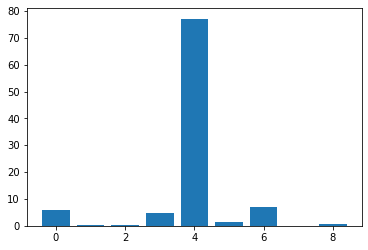

In [64]:
# example of chi squared feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
 
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=100) # !!!!!!!! Only way it works
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

So we can say that features 0,3,5,6 are the most relevant

Feature 0: 0.024601
Feature 1: 0.023206
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.045438
Feature 5: 0.075615
Feature 6: 0.063284
Feature 7: 0.000000
Feature 8: 0.000000


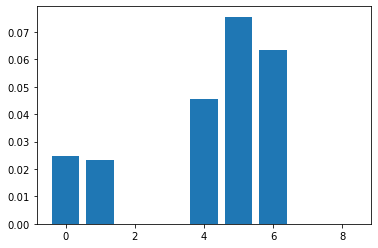

In [66]:
# example of mutual information feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
 
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=100) # !!!!!!!! Only way it works
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all') # <------------------
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [68]:
# evaluation of a model using all input features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=100) # !!!!!!!! Only way it works
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 72.63


In [71]:
# evaluation of a model fit using chi squared input features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=100) # !!!!!!!! Only way it works
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k=4)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs
 
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 74.74


In [72]:
# evaluation of a model fit using mutual information input features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=100) # !!!!!!!! Only way it works
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k=4) # <----------------
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs
 
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 74.74


The optimal way to choose the score_func may cross_validation rather than single train split.